In [2]:
import os, time
import numpy as np
import pandas as pd
import config.hyperparams as hp
from tqdm.notebook import trange, tqdm
from entities.solver_process_ns import SolverProcessNS
from lib.common import disarrange
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from multiprocessing import Queue
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver

### WLAN-LRZ AP Data Loader ####
desc = wlanlrz_loader.load_data_description(hp.AP_DESCR)
original_data, coord_dataframe_list, total_ap, original_merged_raw_ap_data = \
wlanlrz_loader.load_data_parallel(hp.BUILDING, desc, mass_load=True)

Parallel loading of APs data ...
Activating threads now


 12%|█▎        | 7/56 [00:01<00:08,  5.65it/s]]

File not found!


 10%|▉         | 2/21 [00:00<00:04,  4.13it/s]]]

  0%|          | 0/1 [00:00<?, ?it/s] 4.01it/s]

 67%|██████▋   | 2/3 [00:00<00:00,  4.30it/s]s]

File not found!


 13%|█▎        | 3/23 [00:00<00:03,  5.16it/s]]]

100%|██████████| 1/1 [00:00<00:00,  3.79it/s]s]]


File not found!


 91%|█████████ | 20/22 [00:04<00:00,  4.18it/s]

File not found!


 38%|███▊      | 5/13 [00:01<00:01,  4.46it/s]

File not found!


 18%|█▊        | 3/17 [00:00<00:03,  4.09it/s]]]


File not found!



 88%|████████▊ | 7/8 [00:01<00:00,  3.95it/s]

File not found!


 76%|███████▌  | 16/21 [00:04<00:01,  3.47it/s]]

File not found!


 81%|████████  | 30/37 [00:07<00:02,  2.94it/s]]

File not found!


 33%|███▎      | 1/3 [00:00<00:00,  2.46it/s]s]

100%|██████████| 2/2 [00:00<00:00,  2.24it/s]]]]

File not found!


  5%|▍         | 1/21 [00:00<00:04,  4.07it/s]]

 17%|█▋        | 9/53 [00:02<00:13,  3.24it/s]]]

File not found!


100%|██████████| 11/11 [00:03<00:00,  3.51it/s]

File not found!


 67%|██████▋   | 8/12 [00:02<00:01,  2.76it/s]]]

File not found!


 29%|██▊       | 6/21 [00:01<00:04,  3.16it/s]]]

File not found!


 40%|████      | 12/30 [00:03<00:05,  3.25it/s]

File not found!


 77%|███████▋  | 41/53 [00:10<00:05,  2.38it/s]

File not found!


 26%|██▌       | 18/69 [00:05<00:17,  2.85it/s]]

File not found!


 79%|███████▉  | 42/53 [00:10<00:04,  2.52it/s]

File not found!





 85%|████████▍ | 45/53 [00:11<00:02,  3.02it/s]

File not found!


 70%|███████   | 7/10 [00:02<00:01,  2.61it/s]]]

100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

 33%|███▎      | 2/6 [00:00<00:01,  3.56it/s]s]

File not found!



 80%|████████  | 12/15 [00:03<00:00,  3.97it/s]]

File not found!


 93%|█████████▎| 14/15 [00:03<00:00,  4.18it/s]]

File not found!


 50%|█████     | 2/4 [00:00<00:00,  3.22it/s]]

File not found!


100%|██████████| 53/53 [00:14<00:00,  2.86it/s]

File not found!


 33%|███▎      | 5/15 [00:01<00:02,  3.47it/s]]]

File not found!
File not found!


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]]]

100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

File not found!



 47%|████▋     | 7/15 [00:02<00:02,  3.22it/s]]]

File not found!


  4%|▍         | 2/45 [00:00<00:10,  4.08it/s]]


File not found!


100%|██████████| 56/56 [00:15<00:00,  3.55it/s]]

100%|██████████| 7/7 [00:02<00:00,  3.24it/s]]s]

 41%|████      | 34/83 [00:11<00:15,  3.24it/s]

File not found!


 83%|████████▎ | 24/29 [00:07<00:01,  3.31it/s]

File not found!


100%|██████████| 12/12 [00:03<00:00,  3.43it/s]

 59%|█████▉    | 10/17 [00:02<00:01,  3.74it/s]]

 40%|████      | 8/20 [00:01<00:02,  4.07it/s]]]

File not found!


 77%|███████▋  | 40/52 [00:11<00:02,  4.06it/s]]


File not found!


100%|██████████| 26/26 [00:08<00:00,  3.21it/s]

 30%|███       | 6/20 [00:01<00:02,  4.85it/s]]

File not found!
File not found!


  4%|▍         | 2/53 [00:00<00:09,  5.32it/s]]]

File not found!


 78%|███████▊  | 25/32 [00:06<00:01,  3.75it/s]]

 64%|██████▍   | 16/25 [00:04<00:02,  3.37it/s]]


 27%|██▋       | 3/11 [00:00<00:02,  3.23it/s]

 22%|██▏       | 5/23 [00:01<00:04,  3.78it/s]]]

File not found!



 53%|█████▎    | 9/17 [00:02<00:02,  3.45it/s]]

File not found!


100%|██████████| 10/10 [00:02<00:00,  3.86it/s]

File not found!


 20%|██        | 1/5 [00:00<00:01,  2.76it/s]s]]



File not found!


 17%|█▋        | 1/6 [00:00<00:00,  5.06it/s]s]

File not found!


File not found!


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]s]]


100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

 32%|███▏      | 20/63 [00:05<00:13,  3.08it/s]

 44%|████▍     | 28/63 [00:07<00:09,  3.89it/s]

  0%|          | 0/9 [00:00<?, ?it/s] 3.70it/s]s]

  6%|▌         | 1/17 [00:00<00:03,  4.46it/s]]

 12%|█▏        | 2/17 [00:00<00:03,  4.34it/s]]

100%|██████████| 2/2 [00:00<00:00,  4.22it/s]s]

File not found!


 66%|██████▌   | 31/47 [00:08<00:03,  4.57it/s]

File not found!



 57%|█████▋    | 28/49 [00:07<00:04,  4.69it/s]

File not found!


 75%|███████▌  | 114/152 [00:32<00:08,  4.39it/s]

  9%|▉         | 3/32 [00:00<00:06,  4.28it/s]]s]

100%|██████████| 8/8 [00:02<00:00,  3.69it/s]s]

 42%|████▏     | 5/12 [00:01<00:02,  3.50it/s]

File not found!


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]s]

File not found!


100%|██████████| 61/61 [00:08<00:00,  7.39it/s]


In [3]:
from lib.common import generate_agents, generate_edge_nodes

T1_RATIO_VEC_ABS = np.array([100])
T2_RATIO_VEC_ABS = np.array([50])
T3_RATIO_VEC_ABS = np.array([2])

target_ma = 1000

RESULTS = []

print("Total APs: {}".format(total_ap))
original_data['timestamp'] = original_data.index

data = original_data[(original_data.total >= target_ma) & (original_data.total < (target_ma*1.1))].sample()
merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]
merged_raw_ap_data = merged_raw_ap_data.loc[:, (merged_raw_ap_data > 0).all()]

MA = int(data.total)
total_ap = len(merged_raw_ap_data.columns)

TIER_1_EN = T1_RATIO_VEC_ABS[0]
TIER_2_EN = T2_RATIO_VEC_ABS[0]
TIER_3_EN = T3_RATIO_VEC_ABS[0]

EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

if hp.dataset_rtt:
    ### LOAD LATENCY MATRIX FROM DATASET ###
    print("Loading rtt matrix from dataset")
    clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
    rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)
else:
    # Prepare latency matrixes for all the EN classes with increasing latency based on distance from the edge 
    rtt_matrix_en_t1 = np.round(abs(np.random.normal(1, 0.2, (TIER_1_EN, TIER_1_EN))))
    rtt_matrix_en_t2 = np.round(abs(np.random.normal(3, 1, (TIER_1_EN, TIER_2_EN))))
    rtt_matrix_en_t3 = np.round(abs(np.random.normal(10, 1, (TIER_1_EN, TIER_3_EN))))

    sns.distplot(rtt_matrix_en_t1.flatten(), hist=False, rug=True)
    sns.distplot(rtt_matrix_en_t2.flatten(), hist=False, rug=True)
    sns.distplot(rtt_matrix_en_t3.flatten(), hist=False, rug=True)

    rtt_matrix = np.hstack([rtt_matrix_en_t1, rtt_matrix_en_t2, rtt_matrix_en_t3])

for i in range(round(TIER_1_EN)):
    rtt_matrix[i][i] = 1
        
disarrange(rtt_matrix, axis=0)

Total APs: 4371
Loading rtt matrix from dataset


In [4]:
thread_nr = 6

## Tier 1
t1_list = np.zeros(thread_nr, dtype=np.int)
# add = np.floor(len(a)/thread_nr)
for i in range(TIER_1_EN):
    t1_list[i % thread_nr] += 1
    
## Tier 2
t2_list = np.zeros(thread_nr, dtype=np.int)
# add = np.floor(6/len(a))
for i in range(TIER_2_EN):
    t2_list[i % thread_nr] += 1
    
## Tier 3
t3_list = np.zeros(thread_nr, dtype=np.int)
# add = np.floor(6/len(t3_list))
for i in range(TIER_3_EN):
    t3_list[i % thread_nr] += 1

In [5]:
from multiprocessing import Queue
from entities.en_tier import Tier
import time 

dim = 0
iterations = 100

FPS = [10]
k = [0]
greed = [False]
cloud = [False]
alpha = [0.7]
beta = [0.3]
RESULT = []

conv_centr = []

for j in range(len(FPS)):
    print("Set: {}".format(j))
    hp.FPS = np.random.normal(FPS[j], 2, 50)
    hp.local_search_scope = k[j]
    hp.greedy = greed[j]
    hp.alpha = alpha[j]
    hp.beta = beta[j]
    
    gb = merged_raw_ap_data.groupby(np.arange(merged_raw_ap_data.shape[1]) // (merged_raw_ap_data.shape[1]/thread_nr), axis=1)
    mapls = [group for _, group in gb]
    
    for i in range(iterations):
        processes = []
        result_queue = Queue(maxsize=0)
        edge_nodes_g = []
        excluded_agents = []
    
        for nt1,nt2,nt3,ml in zip(t1_list, t2_list, t3_list, mapls):
            en_rat = (nt1, nt2, nt3)
            agents = generate_agents(MA, ml, dim)
            edge_nodes_l = generate_edge_nodes(en_rat, ml, dim)
            
            t = SolverProcessNS(result_queue, agents, edge_nodes_l, rtt_matrix, ml, cloud[j])

            processes.append(t)
            t.start()

        while 1:
            time.sleep(0.01)
            running = any(p.is_alive() for p in processes)
            while not result_queue.empty():
                s = result_queue.get()
                RESULT.append(s)
                excluded_agents.append(s[4])
                edge_nodes_g.append(s[2])
            if not running:
                break
        
        # Phase 2
        if excluded_agents and not cloud[j]:
            start = time.time()
            solver.algorithm_p2(np.concatenate(excluded_agents), np.concatenate(edge_nodes_g), 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True)
            stop = time.time()
            conv_centr.append(stop - start)
#         print("Iteration: {}".format(i))

Set: 0


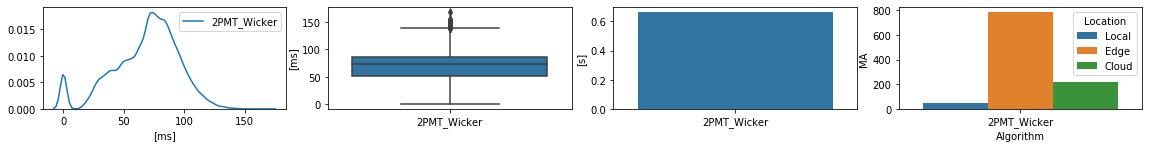

In [6]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1, 4, figsize=(16, 2), constrained_layout=False)
fig.tight_layout()

agents_ls = []
list_of_groups2 = zip(*(iter(RESULT),) * (iterations*(thread_nr)))
LABELS = ["2PMT_Wicker"]

lat_list = []
conv_list = []
df = pd.DataFrame(columns=['Algorithm', 'MA', 'Location'])

## Latency
for i, gr in enumerate(list_of_groups2):
    curr_lat = list(map(lambda a: a.total_latency(), np.concatenate(list(map(lambda z: z[1], gr)))))
    
    #powerlaw.plot_cdf(data=curr_lat, ax=ax[0], label=label)
    sns.distplot(curr_lat, hist=False, ax=ax[0], label=LABELS[i])

    lat_list.append(curr_lat)
    conv_list.append(np.median(list(map(lambda b: b[3], gr))))
    
    agents = np.concatenate(list(map(lambda z: z[1], gr))) 
    
    loc = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))) / iterations
    edge = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations
    cloud = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))) / iterations

    df = df.append({'Algorithm': LABELS[i], 'MA': loc, 'Location': 'Local'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': edge, 'Location': 'Edge'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': cloud, 'Location': 'Cloud'}, ignore_index=True)
    
sns.boxplot(x=LABELS, y=lat_list, ax=ax[1])
sns.barplot(x=LABELS, y=conv_list+np.median(conv_centr), ax=ax[2])
g = sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=ax[3])

#g.text(2,10,4, color='red', ha="center")

ax[0].set_xlabel("[ms]")
ax[1].set_ylabel("[ms]")
ax[2].set_ylabel("[s]")

fig.subplots_adjust(hspace=0.2)
fig.savefig("../plots/multithread/comparison.pdf",  bbox_inches="tight")

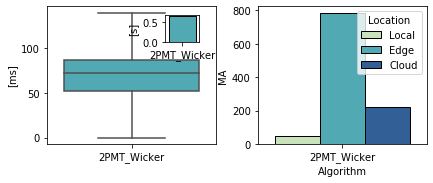

In [26]:
# weird - too packed
fig,axs = plt.subplots(1,2,figsize=(6,2.5), constrained_layout=False)
fig.tight_layout()

sns.boxplot(x=LABELS, y=lat_list, ax=axs[0], showfliers=False, palette="YlGnBu")
sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=axs[1], palette="YlGnBu", edgecolor="black")

axin1 = axs[0].inset_axes([0.70, 0.74, 0.2, 0.2])

sns.barplot(x=LABELS, y=conv_list+np.median(conv_centr), ax=axin1, palette="YlGnBu", edgecolor="black")

axs[0].set_ylabel("[ms]")

axin1.set_ylabel("[s]")

fig.savefig("../plots/multithread/2p_threads_scaling_inset.pdf",  bbox_inches="tight")

In [54]:
iterations = 50
thread_nr = [2,4,6,8,10]

dim = 0

FPS = [10]
k = [0]
greed = [False]
cloud = [False]
alpha = [0.7]
beta = [0.3]
RESULT_S = []

conv_centr = []

for tnr in thread_nr:
    
    print("Threads: {}".format(tnr))

    ## Tier 1
    t1_list = np.zeros(tnr, dtype=np.int)
    # add = np.floor(len(a)/thread_nr)
    for i in range(TIER_1_EN):
        t1_list[i % tnr] += 1

    ## Tier 2
    t2_list = np.zeros(tnr, dtype=np.int)
    # add = np.floor(6/len(a))
    for i in range(TIER_2_EN):
        t2_list[i % tnr] += 1

    ## Tier 3
    t3_list = np.zeros(tnr, dtype=np.int)
    # add = np.floor(6/len(t3_list))
    for i in range(TIER_3_EN):
        t3_list[i % tnr] += 1

    for j in range(len(FPS)):
        print("Set: {}".format(j))
        hp.FPS = np.random.normal(FPS[j], 2, 50)
        hp.local_search_scope = k[j]
        hp.greedy = greed[j]
        hp.alpha = alpha[j]
        hp.beta = beta[j]

        gb = merged_raw_ap_data.groupby(np.arange(merged_raw_ap_data.shape[1]) // (merged_raw_ap_data.shape[1]/tnr), axis=1)
        mapls = [group for _, group in gb]

        for i in range(iterations):
            processes = []
            result_queue = Queue(maxsize=0)
            edge_nodes_g = []
            excluded_agents = []

            for nt1,nt2,nt3,ml in zip(t1_list, t2_list, t3_list, mapls):
                en_rat = (nt1, nt2, nt3)
                agents = generate_agents(MA, ml, dim)
                edge_nodes_l = generate_edge_nodes(en_rat, ml, dim)

                t = SolverProcessNS(result_queue, agents, edge_nodes_l, rtt_matrix, ml, cloud[j])

                processes.append(t)
                t.start()

            while 1:
                time.sleep(0.01)
                running = any(p.is_alive() for p in processes)
                while not result_queue.empty():
                    s = result_queue.get()
                    RESULT_S.append(s)
                    excluded_agents.append(s[4])
                    edge_nodes_g.append(s[2])
                if not running:
                    break

            # Phase 2
            if excluded_agents and not cloud[j]:
                start = time.time()
                solver.algorithm_p2(np.concatenate(excluded_agents), np.concatenate(edge_nodes_g), 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True)
                stop = time.time()
                conv_centr.append(stop - start)

Threads: 2
Set: 0
Threads: 4
Set: 0
Threads: 6
Set: 0
Threads: 8
Set: 0
Threads: 10
Set: 0


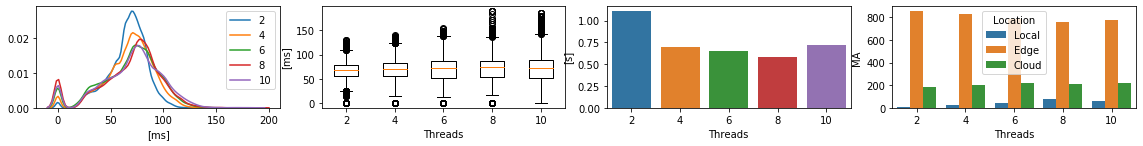

In [39]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1, 4, figsize=(16, 2), constrained_layout=False)
fig.tight_layout()

agents_ls = []
lmt = []
marker = 0

df = pd.DataFrame(columns=['Threads', 'MA', 'Location'])

for trn in thread_nr:
    lmt.append(RESULT_S[marker:(marker+((trn)*iterations))])
    marker = marker+(trn)*iterations

list_of_conv_centr = zip(*(iter(conv_centr),) * (iterations))

median_conv_list = []

for elem in list_of_conv_centr:
    median_conv_list.append(np.median(elem))

lat_list = []
conv_list = []

## Latency
for i, elem in enumerate(lmt):
    curr_lat = list(map(lambda a: a.total_latency(), np.concatenate(list(map(lambda z: z[1], elem)))))
    
    #powerlaw.plot_cdf(data=curr_lat, ax=ax[0], label=label)
    sns.distplot(curr_lat, hist=False, ax=ax[0], label=thread_nr[i])

    lat_list.append(curr_lat)
    conv_list.append(np.median(list(map(lambda b: b[3], elem))))
    
    agents = np.concatenate(list(map(lambda z: z[1], elem))) 

    loc = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))) / iterations
    edge = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations
    cloud = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))) / iterations

    df = df.append({'Threads': thread_nr[i], 'MA': loc, 'Location': 'Local'}, ignore_index=True) \
        .append({'Threads': thread_nr[i], 'MA': edge, 'Location': 'Edge'}, ignore_index=True) \
        .append({'Threads': thread_nr[i], 'MA': cloud, 'Location': 'Cloud'}, ignore_index=True)

p = tuple(sum(t) for t in zip(conv_list, median_conv_list))    

sns.barplot(x=thread_nr, y=p, ax=ax[2], label=thread_nr)
sns.barplot(x="Threads", y="MA", hue="Location", data=df, ax=ax[3])
# sns.boxplot(thread_nr, lat_list, ax=ax[1])
ax[1].boxplot(lat_list, labels=thread_nr)
#g.text(2,10,4, color='red', ha="center")

ax[0].set_xlabel("[ms]")
ax[1].set_ylabel("[ms]")

ax[1].set_xlabel("Threads")
ax[2].set_xlabel("Threads")
ax[2].set_ylabel("[s]")

fig.subplots_adjust(hspace=0.2)
fig.savefig("../plots/multithread/2p_threads_scaling.pdf",  bbox_inches="tight")

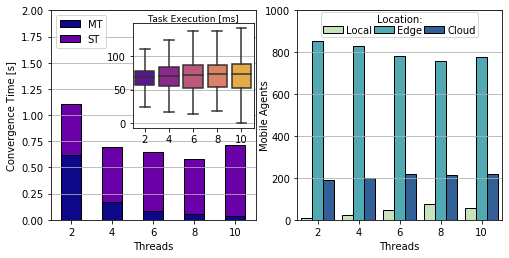

In [139]:
fig,axs = plt.subplots(1,2,figsize=(7,3.5), constrained_layout=False)
fig.tight_layout()

data = {'Threads': thread_nr,
        'MT': conv_list,
        'ST': median_conv_list
        }

mydf = pd.DataFrame(data)

# sns.barplot(x=thread_nr, y=p, ax=axs[0], palette="plasma", edgecolor="black")
mydf.plot(x="Threads", kind='bar', stacked=True, edgecolor="black", color=plt.cm.get_cmap("plasma", 6).colors, ax=axs[0])
plt.setp(axs[0].get_xticklabels(), rotation=0)

sns.barplot(x="Threads", y="MA", hue="Location", data=df, ax=axs[1], palette="YlGnBu", edgecolor="black")

axs[1].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='Location:')

axin1 = axs[0].inset_axes([0.40, 0.44, 0.59, 0.50])
sns.boxplot(x=thread_nr, y=lat_list, ax=axin1, showfliers=False, palette="plasma")

axs[0].set_xlabel("Threads")
axs[0].set_ylabel("Convergence Time [s]")
axs[0].legend(loc=2)

# axin1.set_ylabel("[ms]")
axin1.grid(axis='y')

axs[0].set_ylim(top=2) 
axs[1].set_ylim(top=1000)
axs[1].set_ylabel('Mobile Agents', labelpad=-5)
axin1.set_title('Task Execution [ms]', fontsize=9, pad=3)

for ax in axs:
    ax.grid(axis='y')

fig.savefig("../plots/multithread/2p_threads_scaling_inset.pdf",  bbox_inches="tight")

# added plots

In [141]:
## This will change the style of the plots a bit
import matplotlib

plt.style.use('classic')

matplotlib.rcParams['axes.facecolor'] = 'w'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 3
matplotlib.rcParams['lines.color'] = 'xkcd:blue'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20

width = 7
height = width / 1.618

# Use matplotlib fonts
matplotlib.rcParams['text.usetex']=True

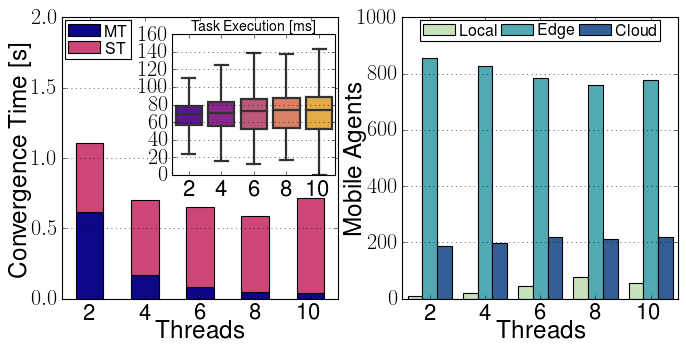

In [188]:
fig,axs = plt.subplots(1,2,figsize=(8.4,4.2), constrained_layout=False)

data = {'Threads': thread_nr,
        'MT': conv_list,
        'ST': median_conv_list
        }

mydf = pd.DataFrame(data)

# sns.barplot(x=thread_nr, y=p, ax=axs[0], palette="plasma", edgecolor="black")
mydf.plot(x="Threads", kind='bar', stacked=True, edgecolor="black", color=plt.cm.get_cmap("plasma", 3).colors, ax=axs[0])
plt.setp(axs[0].get_xticklabels(), rotation=0)

sns.barplot(x="Threads", y="MA", hue="Location", data=df, ax=axs[1], palette="YlGnBu", edgecolor="black")

axs[1].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='')

axin1 = axs[0].inset_axes([0.40, 0.44, 0.59, 0.50])
sns.boxplot(x=thread_nr, y=lat_list, ax=axin1, showfliers=False, palette="plasma")

axs[0].set_ylabel("Convergence Time [s]", labelpad=0.2)
axs[0].legend(loc=2,borderpad=0.2,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.2, columnspacing=0.2)

# axin1.set_ylabel("[ms]")
axin1.grid(axis='y')

axs[0].set_ylim(top=2) 
axs[1].set_ylim(top=1000)
axs[1].set_ylabel('Mobile Agents', labelpad=-8)
axin1.set_title('Task Execution [ms]', fontsize=12.75, pad=3)

for ax in axs:
    ax.grid(axis='y')
    ax.set_xlabel("Threads", labelpad=-2.9)

plt.tight_layout(pad=0, w_pad=0.4)

## the aspect ratio should have remained the same
## don't forget to change the file name
fig.savefig("../plots/multithread/2p_threads_scaling_inset.pdf",  bbox_inches="tight")